In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/emotion-dataset/validation.csv
/kaggle/input/emotion-dataset/training.csv
/kaggle/input/emotion-dataset/test.csv


In [1]:
import pandas as pd
import numpy as np
import panel as pn
import warnings; warnings.filterwarnings('ignore')

def show_panel(df):
    return pn.widgets.Tabulator(df.head(20),
                    show_index=False,
                    pagination='local', 
                         page_size=10)
    
    
pn.extension('tabulator')
pn.widgets.Tabulator.theme = 'bootstrap'

validation = pd.read_csv('/kaggle/input/emotion-dataset/validation.csv')
train = pd.read_csv('/kaggle/input/emotion-dataset/training.csv')
test = pd.read_csv('/kaggle/input/emotion-dataset/test.csv')

print('Dataset information:')
print(f'Training data: {train.shape}')
print(f'Validation data: {validation.shape}')
print(f'Test data: {test.shape}')

Dataset information:
Training data: (16000, 2)
Validation data: (2000, 2)
Test data: (2000, 2)


In [2]:
from datasets import Dataset,DatasetDict,Features,Value,ClassLabel

# Don't forget the class label data
class_names = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
ft = Features({'text': Value('string'), 'label': ClassLabel(names=class_names)})

# Combine Multiple Datasets 
emotions = DatasetDict({
    "train": Dataset.from_pandas(train,features=ft),
    "test": Dataset.from_pandas(test,features=ft),
    "validation": Dataset.from_pandas(validation,features=ft)
    })

# Convert a single DataFrame to a Dataset
# emotions = Dataset.from_pandas(train,features=ft)

emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [3]:
# Training Data
train_ds = emotions["train"]
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [5]:
emotions.set_format(type="pandas")
df = emotions["train"][:]
show_panel(df)

Tabulator(page_size=10, pagination='local', show_index=False, value=              ...)

In [6]:
def label_int2str(row):
    return emotions["train"].features["label"].int2str(row)

df["label_name"] = df["label"].apply(label_int2str)
show_panel(df)

Tabulator(page_size=10, pagination='local', show_index=False, value=              ...)

In [9]:
import plotly.express as px
df["Words Per Tweet"] = df["text"].str.split().apply(len)

px.box(df,y='Words Per Tweet',
       color='label_name',
       template='plotly_white')

In [10]:
text = 'Tokenisation of text is a core task of NLP.'
tokenised_text = list(text)

# Character Tokenised list
print(f'Number of tokens: {len(tokenised_text)}')
print(tokenised_text)
# Mapping Vecabulary dictionary
token2idx = {ch: idx for idx, ch in enumerate(sorted(set(tokenised_text)))}

print(f'Length of vocabulary: {len(token2idx)}')
print(token2idx)
# Let's represent text in numerical format 
input_ids = [token2idx[token] for token in tokenised_text]

print(f'{len(input_ids)} characters')
print(input_ids)
import torch
import torch.nn.functional as F

inputs_ids = torch.tensor(input_ids)
one_hot_encodings = F.one_hot(inputs_ids,num_classes = len(token2idx))
print(f'OHE size: {one_hot_encodings.shape}')

Number of tokens: 43
['T', 'o', 'k', 'e', 'n', 'i', 's', 'a', 't', 'i', 'o', 'n', ' ', 'o', 'f', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P', '.']
Length of vocabulary: 18
{' ': 0, '.': 1, 'L': 2, 'N': 3, 'P': 4, 'T': 5, 'a': 6, 'c': 7, 'e': 8, 'f': 9, 'i': 10, 'k': 11, 'n': 12, 'o': 13, 'r': 14, 's': 15, 't': 16, 'x': 17}
43 characters
[5, 13, 11, 8, 12, 10, 15, 6, 16, 10, 13, 12, 0, 13, 9, 0, 16, 8, 17, 16, 0, 10, 15, 0, 6, 0, 7, 13, 14, 8, 0, 16, 6, 15, 11, 0, 13, 9, 0, 3, 2, 4, 1]
OHE size: torch.Size([43, 18])


In [11]:
tokenised_text = text.split()
print(tokenised_text)
from transformers import AutoTokenizer
text = 'Tokenisation of text is a core task of NLP.'
model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
tokenizer

['Tokenisation', 'of', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

DistilBertTokenizerFast(name_or_path='distilbert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

In [12]:
print('')
print(f'Vocab size: {tokenizer.vocab_size}')
print(f'Max length: {tokenizer.model_max_length}')
print(f'Tokeniser model input names: {tokenizer.model_input_names}')


Vocab size: 30522
Max length: 512
Tokeniser model input names: ['input_ids', 'attention_mask']


In [13]:
print('Encoded text')
encoded_text = tokenizer(text)
print(encoded_text,'\n')

print('Tokens')
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens,'\n')

print('Convert tokens to string')
print(tokenizer.convert_tokens_to_string(tokens),'\n')

Encoded text
{'input_ids': [101, 19204, 6648, 1997, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]} 

Tokens
['[CLS]', 'token', '##isation', 'of', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]'] 

Convert tokens to string
[CLS] tokenisation of text is a core task of nlp. [SEP] 



In [14]:
emotions.reset_format()
def tokenise(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

# Show the tokenised ids
ex_tokenised = tokenise(emotions["train"][:2])
ex_tokenised['attention_mask']

[[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]

In [15]:
import warnings; warnings.filterwarnings('ignore')
from transformers import AutoModel
import torch

model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [16]:
text = "Usa Theis"
inputs = tokenizer(text, return_tensors="pt")
print(f"Input tensor shape: {inputs['input_ids'].size()}")

Input tensor shape: torch.Size([1, 5])


In [17]:
inputs = {k:v.to(device) for k,v in inputs.items()}

with torch.no_grad():
    outputs = model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.2650, -0.0626, -0.0360,  ..., -0.1232,  0.2198,  0.3289],
         [-0.3212,  0.2605, -0.1984,  ..., -0.1207,  0.6034,  0.3164],
         [-0.3673, -0.3216, -0.0846,  ..., -0.0693,  0.3302, -0.2054],
         [-0.5633, -0.3437, -0.2917,  ...,  0.1268,  0.1061,  0.1350],
         [ 0.9663,  0.0471, -0.5144,  ...,  0.0876, -0.5789, -0.2689]]],
       device='cuda:0'), hidden_states=None, attentions=None)


In [21]:
print(outputs.last_hidden_state.size())
print(outputs.last_hidden_state[:,0].size())

torch.Size([1, 5, 768])
torch.Size([1, 768])


In [22]:
def extract_hidden_states(batch):
    
    # Place model inputs on the GPU
    inputs = {k:v.to(device) for k,v in batch.items()
              if k in tokenizer.model_input_names}
    
    # Extract last hidden states
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
        
    # Return vector for [CLS] token
    return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}

In [23]:
emotions_encoded = emotions.map(tokenise, batched=True, batch_size=None)
print(emotions_encoded["train"].column_names)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

['text', 'label', 'input_ids', 'attention_mask']


In [24]:
emotions_encoded.set_format("torch",
                            columns=["input_ids", "attention_mask", "label"])
emotions_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

In [25]:
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)
emotions_hidden["train"].column_names

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

In [26]:
X_train = np.array(emotions_hidden["train"]["hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])
y_train = np.array(emotions_hidden["train"]["label"])
y_valid = np.array(emotions_hidden["validation"]["label"])
print(f'Training Dataset: {X_train.shape}')
print(f'Validation Dataset {X_valid.shape}')

Training Dataset: (16000, 768)
Validation Dataset (2000, 768)


In [27]:
import warnings; warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
X_scaled = MinMaxScaler().fit_transform(X_train)
model = TSNE(n_components=2).fit(X_scaled)
df_embedding = pd.DataFrame(model.embedding_, columns=["X", "Y"])
df_embedding["label"] = y_train

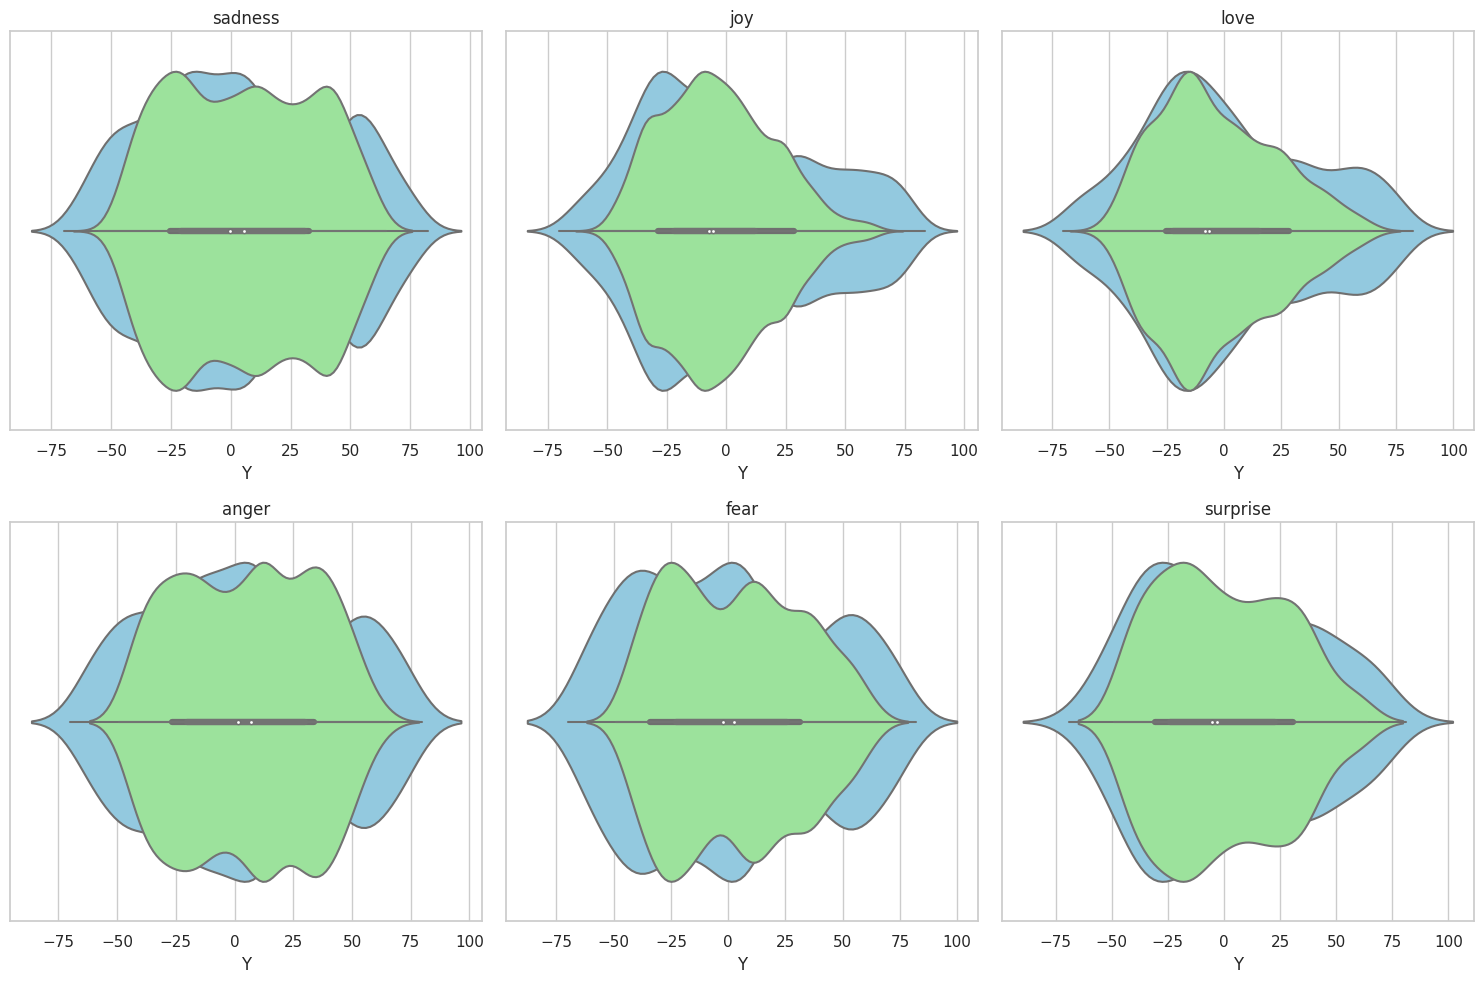

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='whitegrid')

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()
labels = emotions["train"].features["label"].names

for i, label in enumerate(labels):
    
    dict_embedding_sub = dict(tuple(df_embedding.groupby('label')))
    df_embedding_sub = dict_embedding_sub[i]                        

    sns.violinplot(x=df_embedding_sub["X"], ax=axes[i], color='skyblue')
    sns.violinplot(x=df_embedding_sub["Y"], ax=axes[i], color='lightgreen')
    
    axes[i].set_title(f'{label}')

plt.tight_layout()
plt.show()

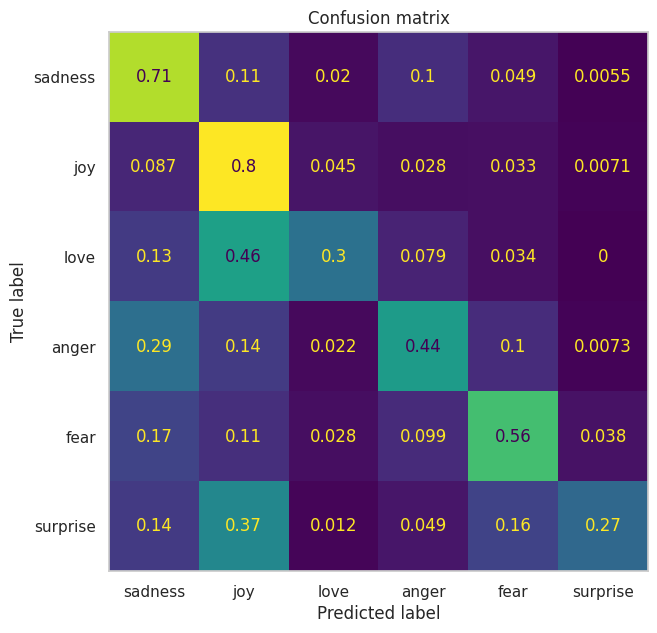

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_model, y_true, labels):
    cm = confusion_matrix(y_true,y_model,normalize='true')
    fig, ax = plt.subplots(figsize=(7,7))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(ax=ax, colorbar=False)
    plt.title("Confusion matrix")
#     plt.axis('off')
    plt.grid(False)
    plt.show()

plot_confusion_matrix(y_preds, y_valid, labels)

In [38]:
from sklearn.linear_model import LogisticRegression as LR

# We increase `max_iter` to guarantee convergence
lr_clf = LR(max_iter = 2000)
lr_clf.fit(X_train, y_train)
y_preds = lr_clf.predict(X_valid)
print(f'accuracy: {lr_clf.score(X_valid, y_valid)}')

accuracy: 0.634


In [40]:
from transformers import AutoModelForSequenceClassification

num_labels = 6

model_ckpt = "distilbert-base-uncased"
model = (AutoModelForSequenceClassification
         .from_pretrained(model_ckpt, 
                          num_labels=num_labels)
         .to(device))

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [41]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [44]:
from transformers import Trainer, TrainingArguments

bs = 64 # batch size
logging_steps = len(emotions_encoded["train"]) // bs
model_name = f"{model_ckpt}-finetuned-emotion"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=10,             # number of training epochs
                                  learning_rate=2e-5,             # model learning rate
                                  per_device_train_batch_size=bs, # batch size
                                  per_device_eval_batch_size=bs,  # batch size
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False, 
                                  report_to="none",
                                  logging_steps=logging_steps,
                                  push_to_hub=False,
                                  log_level="error")

In [45]:
import os
from transformers import Trainer
os.environ['WANDB_DISABLED'] = 'true'

trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=emotions_encoded["train"],
                  eval_dataset=emotions_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.413800,0.215321,0.927000,0.928480
2,0.167600,0.155959,0.942000,0.941670
3,0.120800,0.149087,0.934500,0.935131
4,0.094600,0.136131,0.944500,0.944445
5,0.077500,0.138838,0.938000,0.938445
6,0.064200,0.152950,0.943500,0.943542
7,0.054000,0.161889,0.938500,0.938311
8,0.042600,0.172083,0.937000,0.937394
9,0.036100,0.173524,0.943000,0.943044
10,0.033600,0.173096,0.941500,0.941520


TrainOutput(global_step=2500, training_loss=0.11047926673889161, metrics={'train_runtime': 679.7525, 'train_samples_per_second': 235.38, 'train_steps_per_second': 3.678, 'total_flos': 3601714308480000.0, 'train_loss': 0.11047926673889161, 'epoch': 10.0})

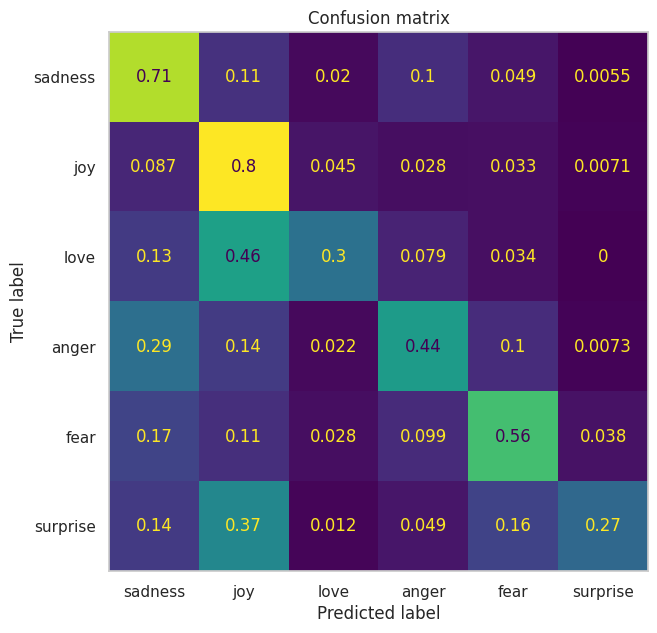

In [46]:
plot_confusion_matrix(y_preds,y_valid,labels)

In [47]:
pred_output = trainer.predict(emotions_encoded["validation"])
pred_output

PredictionOutput(predictions=array([[ 7.5956464, -1.6283321, -1.951566 , -1.6119984, -2.0955007,
        -2.9597535],
       [ 7.5571613, -1.4317957, -2.441635 , -1.4362869, -1.9726598,
        -3.0243936],
       [-2.8332295,  4.2315474,  4.189861 , -3.1641302, -3.8389037,
        -3.1405156],
       ...,
       [-1.4961652,  7.020633 , -1.8569885, -2.0667658, -3.0135694,
        -2.3957553],
       [-2.8185194,  5.4563766,  2.683545 , -2.4877205, -3.9099   ,
        -3.5163589],
       [-2.177853 ,  7.321492 , -1.9846619, -2.9464297, -2.7160857,
        -1.5718539]], dtype=float32), label_ids=array([0, 0, 2, ..., 1, 1, 1]), metrics={'test_loss': 0.17309600114822388, 'test_accuracy': 0.9415, 'test_f1': 0.941519591158808, 'test_runtime': 2.3849, 'test_samples_per_second': 838.596, 'test_steps_per_second': 13.418})

In [54]:
import torch
torch.cuda.empty_cache()

In [33]:
from transformers import AutoModelForSequenceClassification

num_labels = 6

# Use MobileBERT model checkpoint
model_ckpt = "google/mobilebert-uncased"
model = (AutoModelForSequenceClassification
         .from_pretrained(model_ckpt, 
                          num_labels=num_labels)
         .to(device))

from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

from transformers import Trainer, TrainingArguments

bs = 64  # batch size
logging_steps = len(emotions_encoded["train"]) // bs
model_name = f"{model_ckpt}-finetuned-emotion"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=10,             # number of training epochs
                                  learning_rate=2e-5,             # model learning rate
                                  per_device_train_batch_size=bs, # batch size
                                  per_device_eval_batch_size=bs,  # batch size
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False, 
                                  report_to="none",
                                  logging_steps=logging_steps,
                                  push_to_hub=False,
                                  log_level="error")

import os
from transformers import Trainer
os.environ['WANDB_DISABLED'] = 'true'

trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=emotions_encoded["train"],
                  eval_dataset=emotions_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,174523.408000,0.466367,0.834500,0.835431
2,0.356700,0.272317,0.906000,0.905328
3,0.217700,0.220475,0.912000,0.912904
4,0.160700,0.198619,0.925000,0.924943
5,0.136700,0.188258,0.927500,0.927250
6,0.292400,0.179801,0.931000,0.931142
7,0.101200,0.178643,0.930000,0.929711
8,0.091800,0.183659,0.933000,0.932771
9,0.083700,0.188115,0.930500,0.930439
10,0.078200,0.186688,0.927000,0.927019


TrainOutput(global_step=2500, training_loss=17452.492706178284, metrics={'train_runtime': 773.1472, 'train_samples_per_second': 206.946, 'train_steps_per_second': 3.234, 'total_flos': 1705059296640000.0, 'train_loss': 17452.492706178284, 'epoch': 10.0})

In [36]:
y_preds = (X_valid)

In [39]:
# Predict on Validation Dataset
pred_output = trainer.predict(emotions_encoded["validation"])
pred_output
print(f'Output Predition: {pred_output.predictions.shape}')
print(pred_output.predictions)
y_preds = np.argmax(pred_output.predictions,axis=1)
print(f'Output Prediction:{y_preds.shape}')
print(f'Predictions: {y_preds}')
pred_output.metrics

Output Predition: (2000, 6)
[[ 7.413011   -0.5357268  -2.0599174  -5.9989853  -7.4012094  -6.604681  ]
 [ 8.239707   -6.3053555  -6.399935   -5.9033604  -3.3303711  -2.8216856 ]
 [-0.47181857  8.1672125   8.054218   -0.65561247 -9.620611   -7.803854  ]
 ...
 [-3.0118842   8.0478945  -1.4058727  -4.9053407  -7.3612103  -5.9921155 ]
 [-4.6326003   5.4982185   5.2571754  -1.5601859  -5.60075    -7.905995  ]
 [-5.6797695  12.251505    0.01570845 -7.645191   -5.4603977  -1.8040115 ]]
Output Prediction:(2000,)
Predictions: [0 0 1 ... 1 1 1]


{'test_loss': 0.18668781220912933,
 'test_accuracy': 0.927,
 'test_f1': 0.9270193364923104,
 'test_runtime': 2.1475,
 'test_samples_per_second': 931.294,
 'test_steps_per_second': 14.901}

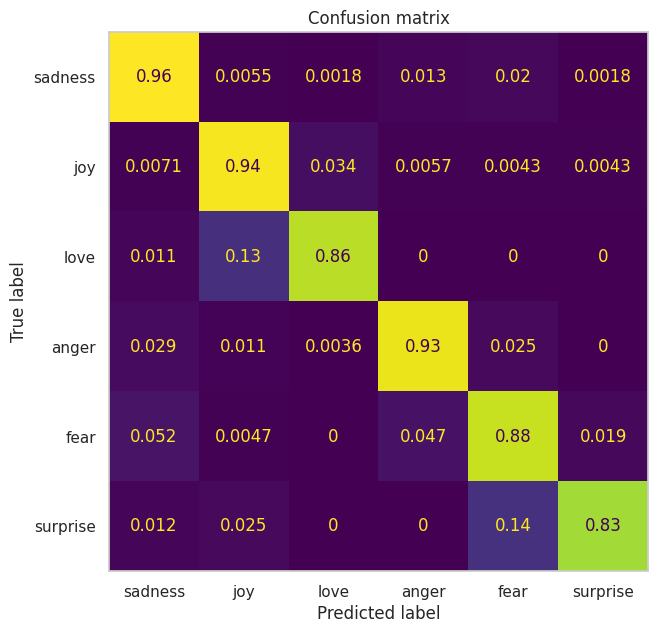

In [40]:
plot_confusion_matrix(y_preds,y_valid,labels)

In [41]:
trainer.save_model()
from transformers import pipeline

# load from previously saved model
classifier = pipeline("text-classification", model="distilbert-base-uncased-finetuned-emotion")

OSError: distilbert-base-uncased-finetuned-emotion is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `huggingface-cli login` or by passing `token=<your_token>`